In [808]:
from utils import *

import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(formatter={'float': '{: 0.2f}'.format})

In [809]:
# Input data

# Amount of numbers 
center = 10
std = 1
n = 100

numbers = np.random.normal(center, std, n)

# gaussian = np.random.normal(center, std, n)
# extra_noise = np.random.randint(-100,100,1000)
# numbers = np.concatenate((gaussian, extra_noise))
# n = numbers.shape[0]

In [810]:
# Initial value
x0 = 1.0

# Loss function initiation
r = np.zeros(n)
for i in range(n):
    r[i] = np.linalg.norm(numbers[i] - x0)
r0_max = np.max(r)
r0_max

11.478246728192453

In [811]:
# GNC initiation
max_iterations = 1000
eps = 0.2
mu_update = 1.4
w = np.ones(n)
mu = eps**2 / (2*r0_max**2 - eps**2)
print(mu)

0.000151825533568035


In [812]:
# GNC iteration
last_iter = []
x_iter = [x0]
iterations = 0
for i in range(max_iterations):
    iterations += 1
    last_iter.append(np.sum(w))
    # Weighted average
    x = np.dot(numbers,w)/np.sum(w)
    x_iter.append(x)

    # Loss function
    for j in range(n):
        r[j] = np.linalg.norm(numbers[j] - x)
        w[j] = w_from_r(r[j], eps, mu)
    
    mu = mu_update * mu
    
    if i >= 5:
        if np.sum(w) == last_iter[i]:
            break

print("Ended after", iterations, "iterations\n")

Ended after 32 iterations



In [813]:
inliers = []
outliers = []

for i, n in enumerate(numbers):
    if w[i] == 1.0:
        inliers.append(n)
    else:
        outliers.append(n)

percentage = (1-len(inliers)/(len(outliers)+len(inliers)))*100

print("Inliers:\t", len(inliers), "\nOutliers:\t", len(outliers),\
    "\nPercentage:\t",percentage)

Inliers:	 16 
Outliers:	 84 
Percentage:	 84.0


In [814]:
print("\n x = \n {}".format(x))
print("\n r = \n {}".format(r))
print("\n w = \n {}".format(w))
print(mu)


 x = 
 10.066495775196802

 r = 
 [ 2.41  0.39  0.84  0.62  0.24  1.09  0.68  1.87  1.16  1.19  1.18  0.82
  0.45  0.95  0.29  0.31  0.25  0.15  0.02  0.98  0.83  1.42  0.41  2.22
  1.37  0.84  1.91  0.41  0.70  0.42  0.53  1.45  1.01  1.79  1.10  1.07
  0.50  0.09  0.83  0.09  0.92  0.95  0.15  1.16  0.78  0.89  0.58  1.01
  0.98  0.05  0.14  0.04  0.48  0.26  1.20  1.41  1.03  1.40  0.07  0.41
  0.91  0.62  1.42  1.79  0.35  1.21  0.26  1.27  0.45  1.56  0.38  0.02
  1.26  0.11  2.46  2.13  1.26  0.11  0.03  0.34  0.46  0.30  0.36  0.02
  0.80  0.30  2.11  0.05  0.40  0.11  1.44  0.77  0.29  0.46  0.47  0.84
  0.68  0.50  0.35  1.21]

 w = 
 [ 0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00
  0.00  0.00  0.00  0.00  0.00  1.00  1.00  0.00  0.00  0.00  0.00  0.00
  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00
  0.00  1.00  0.00  1.00  0.00  0.00  1.00  0.00  0.00  0.00  0.00  0.00
  0.00  1.00  1.00  1.00  0.00  0.00  0.00  0.00  0.00 

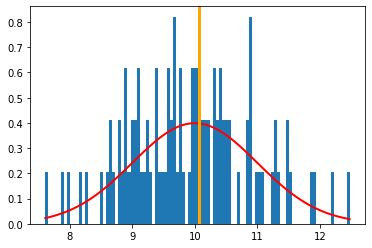

In [815]:
count, bins, ignored = plt.hist(numbers, 100, density=True)
plt.plot(bins, 1/(std * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - center)**2 / (2 * std**2) ),
         linewidth=2, color='r')
plt.axvline(x, linewidth=3 ,color='orange')
plt.show()

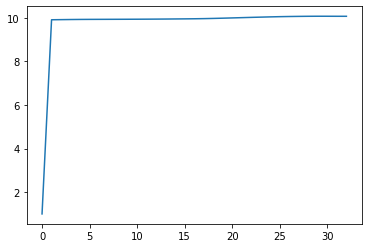

In [816]:
plt.plot(x_iter)